# Detecting Insults in Social Commentary

## 1. Business Understanding

### 1.1 Project description

Analyzing data and detecting if a sentence contains insults, profanity, racial slurs, or any offensive words

### 1.2 Project objectives

- Detect whether comments in my dataset contain insults or not
- Analyze and visualize the data

## 2. Data Understanding

### 2.1. Importing the data

In [1]:
import pandas

data = pandas.read_csv('OneDrive/Desktop/DetectingInsults/train.csv')

### 2.2. Data exploration

In [2]:
data.head(50)

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
5,0,20120620171226Z,"""@SDL OK, but I would hope they'd sign him to ..."
6,0,20120503012628Z,"""Yeah and where are you now?"""
7,1,NaN,"""shut the fuck up. you and the rest of your fa..."
8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,1,20120620160512Z,"""That you are an idiot who understands neither..."


### 2.2.1 Columns description

- Insults: It can be either 1 or 0 (Some of these comments are not accurately marked. eg: 44)
    0: No insult detected in the comment
    1: Insult detected in the comment
- Date: The date the comment was made --> iN THE FORMAT "YYYYMMDDhhmmssZ"
- Comment: The sentence itself which may or may not contain insults

## 3. Data preparation and pre-processing

### 3.1. Data cleaning

In [11]:
with open('OneDrive/Desktop/DetectingInsults/train.csv') as file:
    # Create an empty dictionary to store insulting words and their descriptions
    dictionary = {}
    
    # Iterate through each line in the file
    for line in file:
        # Split each line into two parts using a comma as a separator
        parts = line.split(',')
        
        # Check if there are exactly two parts
        if len(parts) == 2:
            # Store the first part as the key and the second part as the value in the dictionary
            key = parts[0]
            value = parts[1].strip()  # Remove leading/trailing whitespaces
            
            dictionary[key] = value

# Filter a DataFrame called 'df' to select rows where the 'Comment' column contains the substring "insults" (case-insensitive)
filtered_data = data[data['Comment'].str.contains("insults", na=True)]

# Display the first few rows of the filtered DataFrame
filtered_data.head()

,Insult,Date,Comment
277,1,20120529025307Z,"""haha...atleast get your insults straight you ..."
1271,0,NaN,"""All that hatred inside of you must have eaten..."
2528,0,20120529100821Z,"""Yep, it's pretty std with liberals. \xa0When ..."
2764,0,20120620045051Z,"""joseywhales, thank you kindly for proving my ..."
3239,0,20120529034620Z,"""I don't know what the insults are for,\nI tho..."


### 3.2. Data visualization

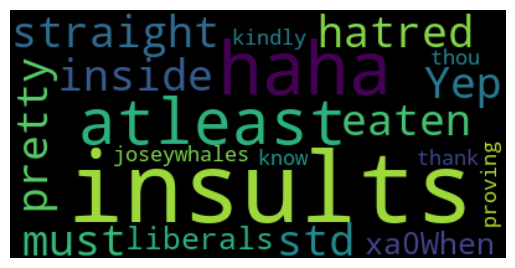

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Get the 'Comment' column from the filtered data and convert it to a single string
text = filtered_data['Comment'].to_string(index=False)

# Process the text by substituting '\s' (space characters) with a single space
processed_text = re.sub(r'\s', ' ', text)

# Create an object wordcloud with settings of max and minimum word length to be used for the word cloud
wordcloud = WordCloud(max_words=100, min_word_length=3).generate(processed_text)

# Display the word cloud using Matplotlib
plt.imshow(wordcloud, interpolation="bilinear")

# To remove axis labels
plt.axis('off')

plt.show()

### 3.3 Data reduction

### 3.4 Data transformation

### 3.4. Feature selection

## 4. Modeling

## 5. Evaluation

## 6. Insights, Conclusions and Business recommendations

## 7. Deployment